In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ANN import MLP
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), 
                                            std=(3*0.2023, 3*0.1994, 3*0.2010))])

cifar_dset_train = torchvision.datasets.CIFAR100('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(cifar_dset_train, batch_size=20, shuffle=True, num_workers=0)

cifar_dset_test = torchvision.datasets.CIFAR100('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(cifar_dset_test, batch_size=20, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
# criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [int(32*32*3), 2000, 1000, 1000, 1000, 100]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.01056


0.01056

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
        #loss = criterion(y_hat,y)
        loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    trn_acc = evaluateClassification_topk(model, train_loader, device, (1,5), False)
    tst_acc = evaluateClassification_topk(model, test_loader, device, (1,5), False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, (top {}) Train Accuracy : {}, Test Accuracy : {}".format( epoch_+1,(1,5), trn_acc, tst_acc))

2500it [00:12, 194.71it/s]
20it [00:00, 196.30it/s]

Epoch : 1, (top (1, 5)) Train Accuracy : [0.19268 0.46128], Test Accuracy : [0.174  0.4246]


2500it [00:12, 195.08it/s]
20it [00:00, 194.14it/s]

Epoch : 2, (top (1, 5)) Train Accuracy : [0.23572 0.5193 ], Test Accuracy : [0.2016 0.4657]


2500it [00:12, 192.90it/s]
20it [00:00, 193.83it/s]

Epoch : 3, (top (1, 5)) Train Accuracy : [0.29078 0.58126], Test Accuracy : [0.2323 0.4982]


2500it [00:12, 195.51it/s]
19it [00:00, 188.41it/s]

Epoch : 4, (top (1, 5)) Train Accuracy : [0.31948 0.6117 ], Test Accuracy : [0.2439 0.5082]


2500it [00:12, 192.66it/s]
20it [00:00, 194.02it/s]

Epoch : 5, (top (1, 5)) Train Accuracy : [0.36898 0.66218], Test Accuracy : [0.2544 0.5283]


2500it [00:12, 194.26it/s]
20it [00:00, 192.38it/s]

Epoch : 6, (top (1, 5)) Train Accuracy : [0.4147 0.7046], Test Accuracy : [0.2703 0.5384]


2500it [00:12, 192.50it/s]
20it [00:00, 193.12it/s]

Epoch : 7, (top (1, 5)) Train Accuracy : [0.45674 0.74242], Test Accuracy : [0.2721 0.5368]


2500it [00:12, 193.82it/s]
19it [00:00, 188.84it/s]

Epoch : 8, (top (1, 5)) Train Accuracy : [0.5052 0.7825], Test Accuracy : [0.2836 0.5357]


2500it [00:13, 190.23it/s]
20it [00:00, 194.17it/s]

Epoch : 9, (top (1, 5)) Train Accuracy : [0.55182 0.80922], Test Accuracy : [0.2845 0.5399]


2500it [00:12, 193.41it/s]
20it [00:00, 193.36it/s]

Epoch : 10, (top (1, 5)) Train Accuracy : [0.59836 0.84248], Test Accuracy : [0.291  0.5397]


2500it [00:13, 191.15it/s]
20it [00:00, 193.54it/s]

Epoch : 11, (top (1, 5)) Train Accuracy : [0.64006 0.86674], Test Accuracy : [0.2926 0.5328]


2500it [00:12, 193.13it/s]
20it [00:00, 194.25it/s]

Epoch : 12, (top (1, 5)) Train Accuracy : [0.68744 0.8885 ], Test Accuracy : [0.2955 0.5236]


2500it [00:13, 190.79it/s]
20it [00:00, 196.61it/s]

Epoch : 13, (top (1, 5)) Train Accuracy : [0.72764 0.90774], Test Accuracy : [0.2949 0.5245]


2500it [00:13, 191.12it/s]
20it [00:00, 192.80it/s]

Epoch : 14, (top (1, 5)) Train Accuracy : [0.76554 0.92328], Test Accuracy : [0.2952 0.5185]


2500it [00:13, 190.85it/s]
20it [00:00, 193.66it/s]

Epoch : 15, (top (1, 5)) Train Accuracy : [0.79352 0.93694], Test Accuracy : [0.295  0.5131]


2500it [00:13, 191.91it/s]
20it [00:00, 193.90it/s]

Epoch : 16, (top (1, 5)) Train Accuracy : [0.82462 0.94546], Test Accuracy : [0.2944 0.5   ]


2500it [00:13, 191.35it/s]
20it [00:00, 191.59it/s]

Epoch : 17, (top (1, 5)) Train Accuracy : [0.85096 0.95516], Test Accuracy : [0.29   0.5037]


2500it [00:13, 191.88it/s]
20it [00:00, 194.18it/s]

Epoch : 18, (top (1, 5)) Train Accuracy : [0.87174 0.96082], Test Accuracy : [0.2901 0.5012]


2500it [00:13, 191.33it/s]
19it [00:00, 188.85it/s]

Epoch : 19, (top (1, 5)) Train Accuracy : [0.8847 0.9633], Test Accuracy : [0.2918 0.4911]


2500it [00:13, 191.42it/s]


Epoch : 20, (top (1, 5)) Train Accuracy : [0.90476 0.96958], Test Accuracy : [0.2889 0.4917]


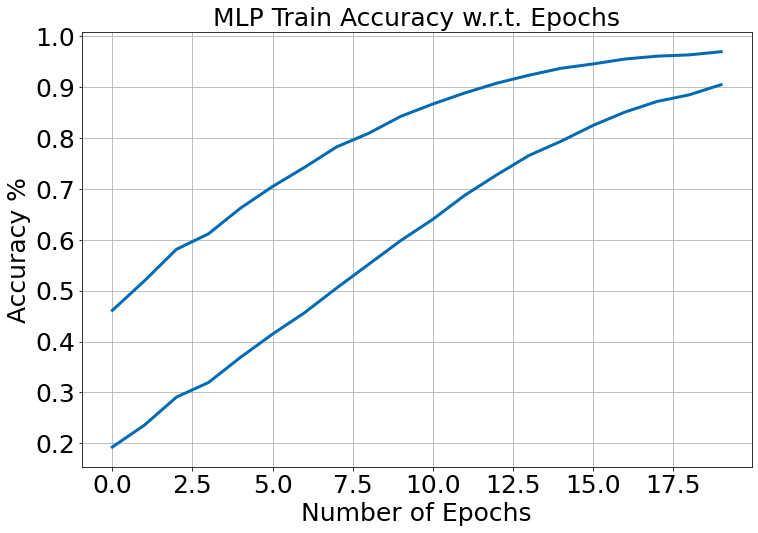

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

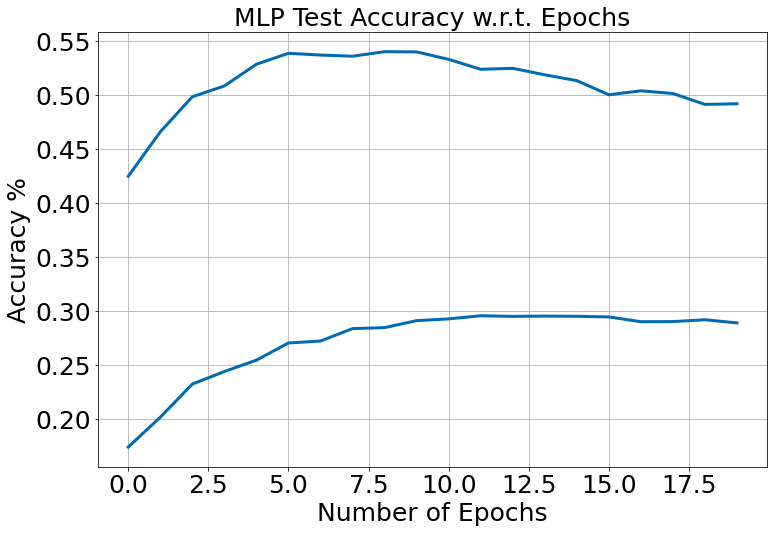

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

In [9]:
print("Epoch : {}, (top {}) Train Accuracy : {}, Test Accuracy : {}".format( epoch_+1,(1,5), trn_acc, tst_acc))

Epoch : 20, (top (1, 5)) Train Accuracy : [0.90476 0.96958], Test Accuracy : [0.2889 0.4917]


In [10]:
def evaluateClassification_topk(model, loader, device, topk = (1,), printing = True):
    # Evaluate Artificial Neural Network on Classification Task
    model.eval()
    correct = 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        
        y_hat = model(x)
        
        pred = torch.argmax(y_hat, dim=1)#.squeeze()  
        correct += topk_accuracy(y_hat.T, y, topk)[1]

    acc = correct/len(loader.dataset) 
    if printing:
        print('Accuracy :\t', acc)   
    return acc

In [11]:
evaluateClassification_topk(model, train_loader, device, (1,5), False)

array([0.90476, 0.96958])